In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [6]:
# IBMQ.save_account("J4REhSDcrZ_mA9hY1HdzTWJknxrhcnbNv1efI1Wr4wKx")
# IBM Quantum Platform（無料プランなど）
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="J4REhSDcrZ_mA9hY1HdzTWJknxrhcnbNv1efI1Wr4wKx"
)


qiskit_runtime_service.__init__:WARNING:2025-11-04 18:18:12,640: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


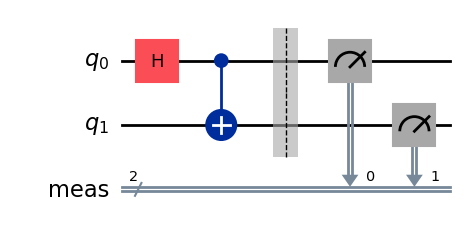

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# === 1. IBM Quantumサービスに接続 ===
service = QiskitRuntimeService()  # すでに IBMQ.save_account() 済みであればOK

# === 2. 量子回路を作成 ===
qc = QuantumCircuit(2)
qc.h(0)        # 1量子ビット目を重ね合わせ
qc.cx(0, 1)    # CNOTでエンタングルメント
qc.measure_all()

qc.draw('mpl')  # 回路図を表示（Jupyter用）

In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
print("利用可能なバックエンド一覧:")
for b in service.backends():
    print("-", b.name)


qiskit_runtime_service.__init__:WARNING:2025-11-04 18:18:20,526: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-04 18:18:20,528: Loading instance: open-instance, plan: open


利用可能なバックエンド一覧:
- ibm_brisbane
- ibm_fez
- ibm_marrakesh
- ibm_torino


In [14]:
# === 3. 実機またはシミュレータを選択 ===
# シミュレータを使う場合（即時実行）：
# backend = service.backend("ibm_qasm_simulator")
# 実機を指定
backend = service.backend("ibm_brisbane")

# トランスパイル時に backend を指定しない
tqc = transpile(qc)

# 実機に送信
sampler = Sampler(backend=backend)
job = sampler.run([tqc])
result = job.result()


qiskit_runtime_service.backends:WARNING:2025-11-04 18:18:29,171: Using instance: open-instance, plan: open


TypeError: SamplerV2.__init__() got an unexpected keyword argument 'backend'

In [ ]:
# === 6. 測定結果を取得して可視化 ===
# quasi確率分布（理想状態では {'00': 0.5, '11': 0.5}）
dist = result[0].data.meas.get_counts()
print("測定結果:", dist)

# === 7. グラフ描画 ===
plot_histogram(dist, title="Quantum Measurement Results (Bell State)")
plt.show()
